### Friswell problem 9.8.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA

In [2]:
k1 = 2e6
k2 = 3e6
Im = 150
Is = 8
Il = 450
Ic = 1062
g = 1/6

In [5]:
k = (k1*k2)/(k1 + k2)
Ie = Is + g**2*(Il + Ic)
print("Referred inertia of cone and large gear = ", Ie, "kg m^2")
print("Equivalent shaft stiffness = ", k/1e6, "MN/rad")

Referred inertia of cone and large gear =  50.0 kg m^2
Equivalent shaft stiffness =  1.2 MN/rad


In [13]:
M = np.array([[Im, 0], [0, Ie]])
K = np.array([[k, -k], [-k, k]])
lam, u = LA.eig(K,M)
omega_n = np.sqrt(np.diag(lam))/2/np.pi
print("Natural frequency = ", omega_n[1], "Hz")
print("Mode shape = ", u[0,1], "  ", u[1,1])

Natural frequency =  [ 0.        +0.j 28.47050174+0.j] Hz
Mode shape =  -0.3162277660168378    0.9486832980505138


In [11]:
omegaf_Hz = [10, 20, 30, 40, 50]
torque = np.zeros(len(omegaf_Hz))
for cs in range(len(omegaf_Hz)):
    omegaf = omegaf_Hz[cs]*2*np.pi
    Z = K-omegaf**2*M
    Q = np.array([[0],[3000*g]])
    q = LA.solve(Z, Q)
    torque[cs] = np.abs(k*(q[0]-q[1]))

print(torque)

[ 427.77457255  740.34621124 3398.87897343  385.04154456  179.92071611]


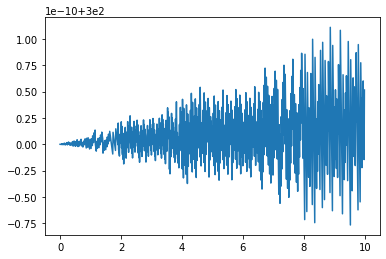

In [18]:
# gear excitation from example 9.7.3
t = np.arange(0, 10, 0.01)
q_ref = 300*np.cos(200*np.pi*t)+50*np.sin(400*np.pi*t)
plt.plot(t, q_ref)